<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-10 07:07:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  63.1MB/s    in 3.2s    

2025-09-10 07:07:38 (63.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 168.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 166.9 MB/s eta 0:00:00


In [15]:
!pip install matplotlib
!pip install seaborn

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


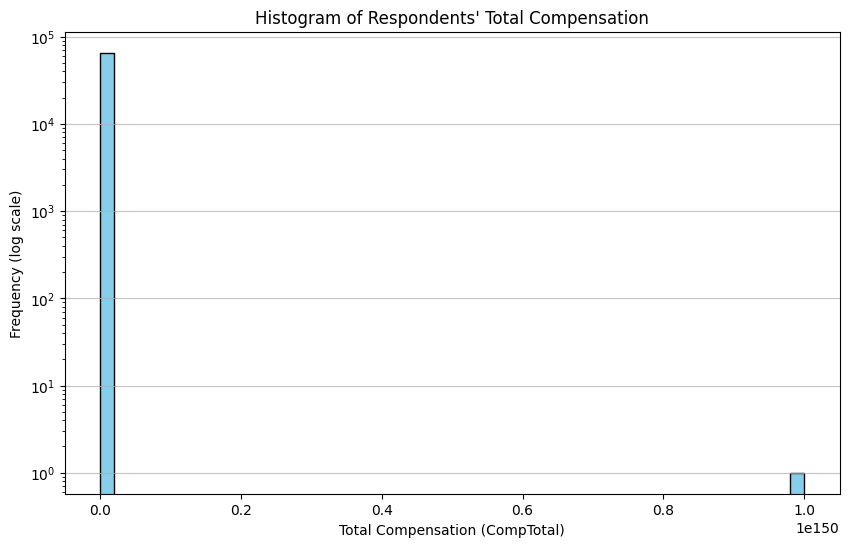

In [10]:
## Write your code here
# Connect and read CompTotal
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT CompTotal FROM main", conn)

# Replace NaN with mean
mean_value = df_sql["CompTotal"].mean(skipna=True)
comp_data = df_sql["CompTotal"].fillna(mean_value)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color="skyblue", edgecolor="black")
plt.yscale("log")  # log scale for better visualization
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Respondents' Total Compensation")
plt.grid(axis="y", alpha=0.75)
plt.show()

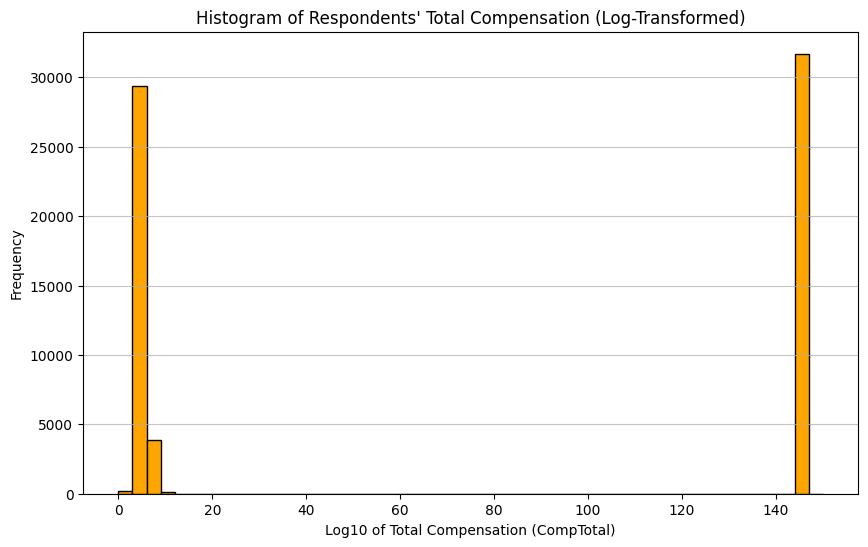

In [11]:
# Connect and read CompTotal
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT CompTotal FROM main", conn)

# Replace NaN with mean
mean_value = df_sql["CompTotal"].mean(skipna=True)
comp_data = df_sql["CompTotal"].fillna(mean_value)

# Apply log10 transformation (avoid log(0) by filtering)
log_comp = np.log10(comp_data[comp_data > 0])

# Plot histogram with log-transformed x-axis
plt.figure(figsize=(10, 6))
plt.hist(log_comp, bins=50, color="orange", edgecolor="black")
plt.xlabel("Log10 of Total Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.title("Histogram of Respondents' Total Compensation (Log-Transformed)")
plt.grid(axis="y", alpha=0.75)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


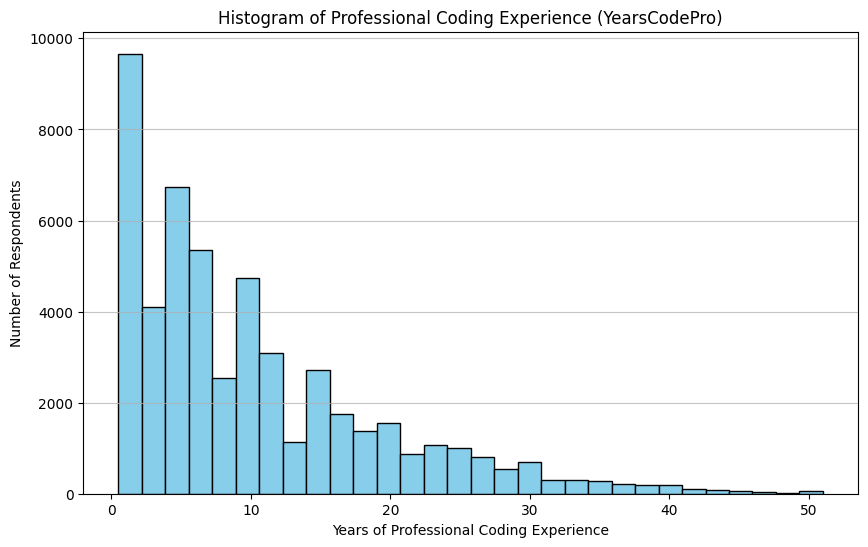

In [12]:
## Write your code here

# Connect and read YearsCodePro
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT YearsCodePro FROM main", conn)

# Convert YearsCodePro to numeric
def convert_years(value):
    if pd.isna(value):
        return np.nan
    if "Less than 1 year" in str(value):
        return 0.5
    if "More than 50 years" in str(value):
        return 51
    try:
        return float(value)
    except:
        return np.nan

df_sql["YearsCodeProNumeric"] = df_sql["YearsCodePro"].apply(convert_years)

# Drop NaN values
years_data = df_sql["YearsCodeProNumeric"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(years_data, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Professional Coding Experience (YearsCodePro)")
plt.grid(axis="y", alpha=0.75)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


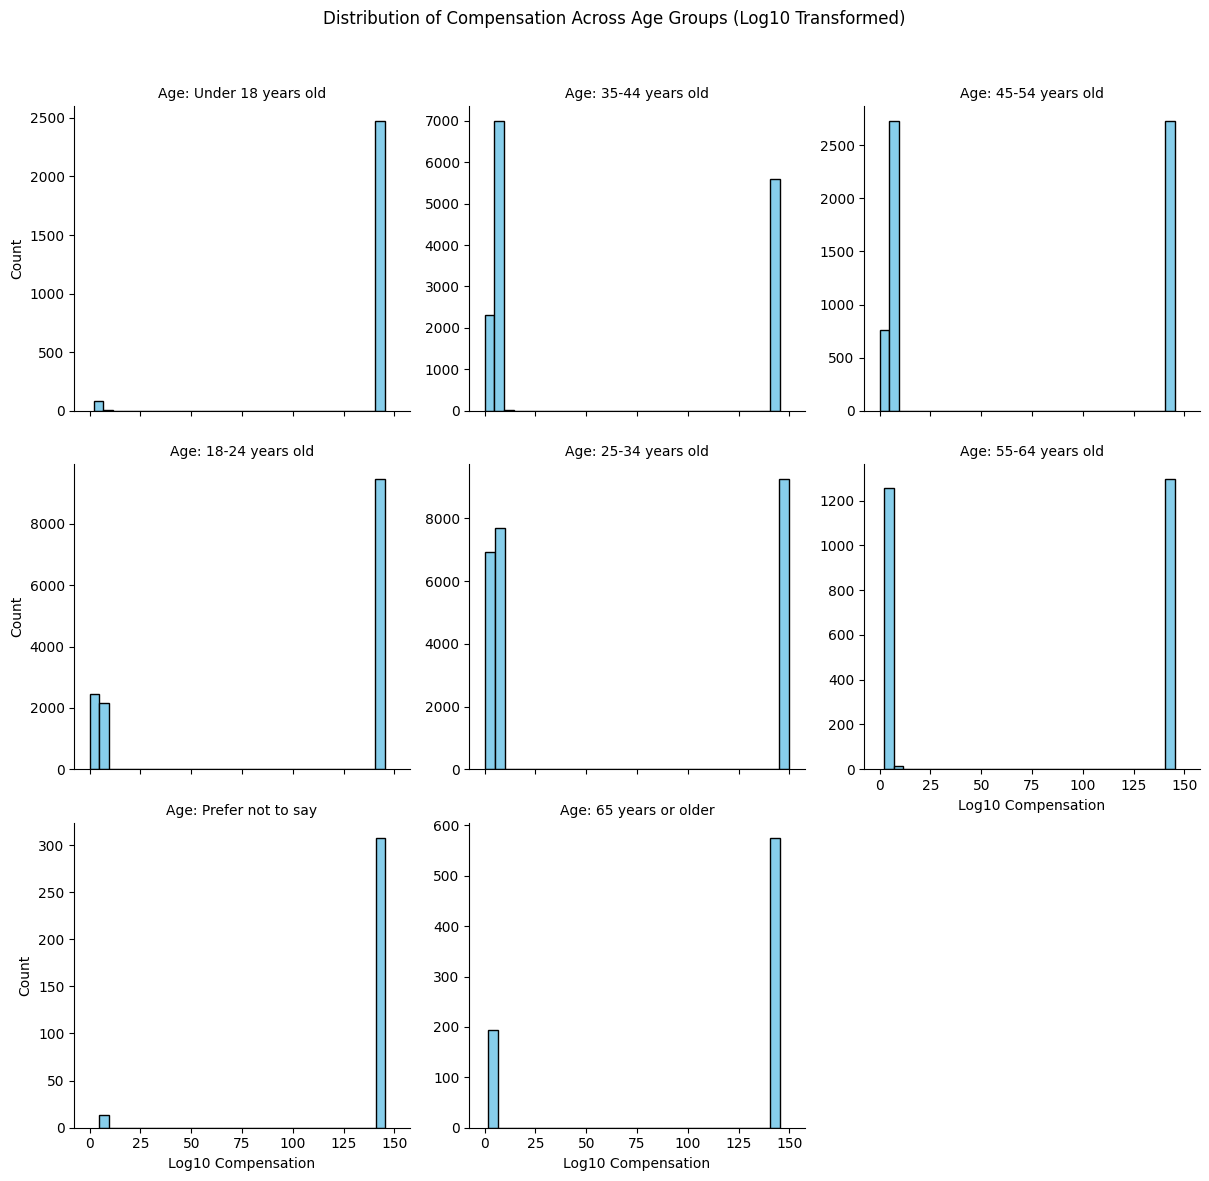

In [17]:
## Write your code here
# Connect and read Age + CompTotal
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, CompTotal FROM main", conn)

# Replace NaN in CompTotal with mean
mean_value = df_sql["CompTotal"].mean(skipna=True)
df_sql["CompTotal"] = df_sql["CompTotal"].fillna(mean_value)

# Apply log10 transform to CompTotal (filter out non-positive values)
df_sql = df_sql[df_sql["CompTotal"] > 0]
df_sql["LogCompTotal"] = np.log10(df_sql["CompTotal"])

# Plot faceted histograms by Age group
g = sns.FacetGrid(df_sql, col="Age", col_wrap=3, sharex=True, sharey=False, height=4)
g.map(plt.hist, "LogCompTotal", bins=30, color="skyblue", edgecolor="black")

g.set_axis_labels("Log10 Compensation", "Count")
g.set_titles("Age: {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Compensation Across Age Groups (Log10 Transformed)")
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


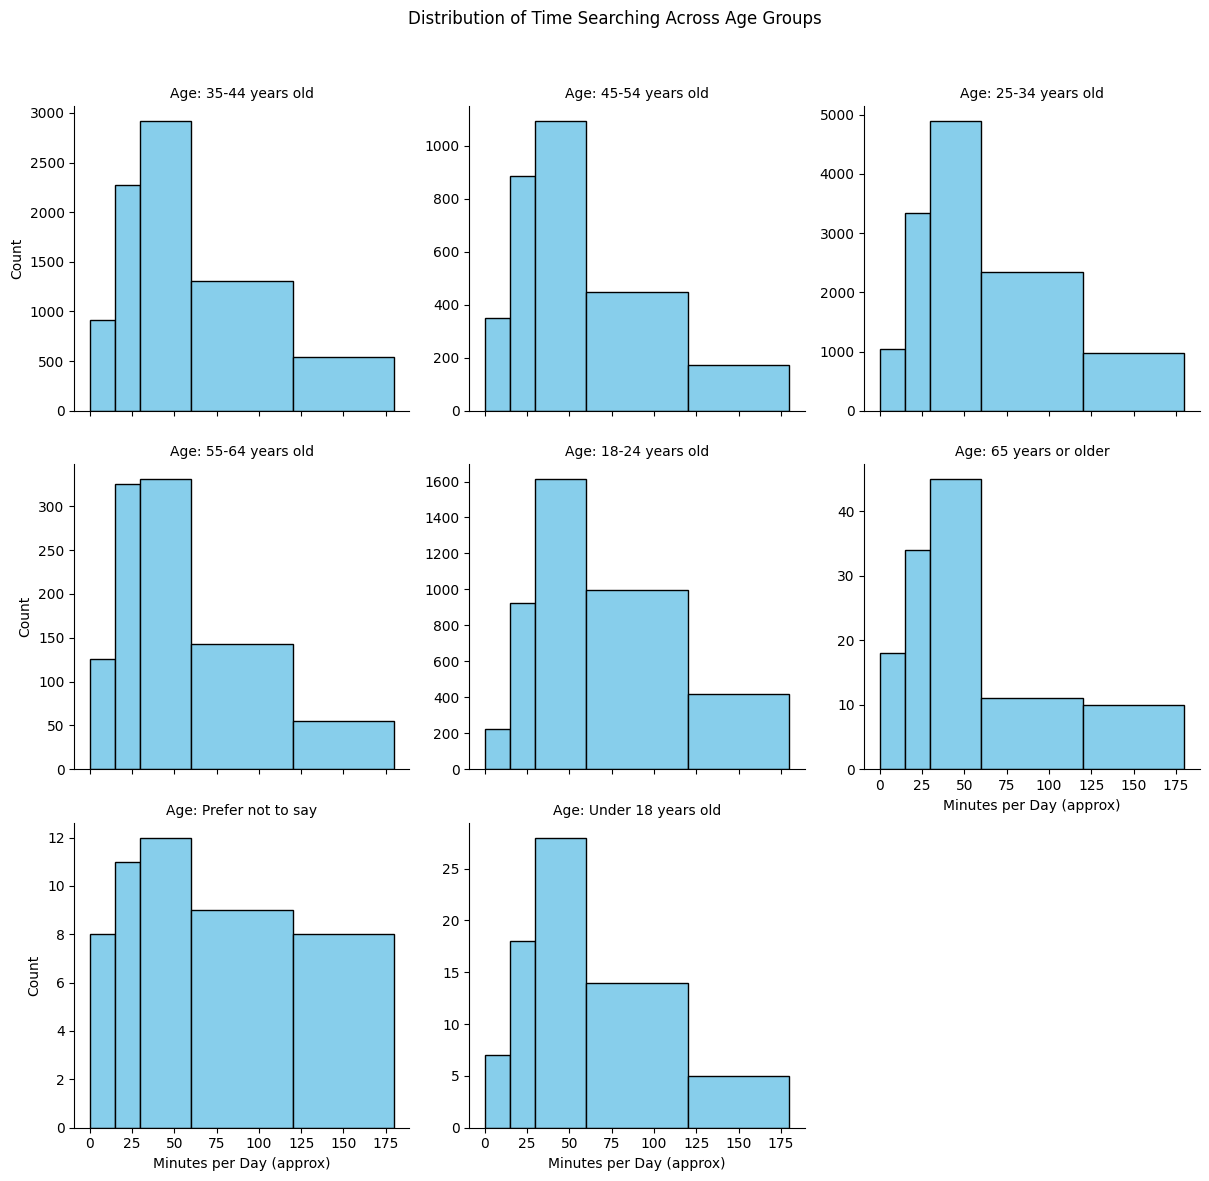

In [18]:
## Write your code here
# Connect and read Age + TimeSearching
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, TimeSearching FROM main", conn)

# Map time ranges to numeric midpoints
time_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150,
    "NA": np.nan
}
df_sql["TimeSearchingNumeric"] = df_sql["TimeSearching"].map(time_map)

# Drop missing values
df_sql = df_sql.dropna(subset=["TimeSearchingNumeric", "Age"])

# Plot faceted histograms by Age group
g = sns.FacetGrid(df_sql, col="Age", col_wrap=3, sharex=True, sharey=False, height=4)
g.map(plt.hist, "TimeSearchingNumeric", bins=[0,15,30,60,120,180], 
      color="skyblue", edgecolor="black")

g.set_axis_labels("Minutes per Day (approx)", "Count")
g.set_titles("Age: {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Time Searching Across Age Groups")
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


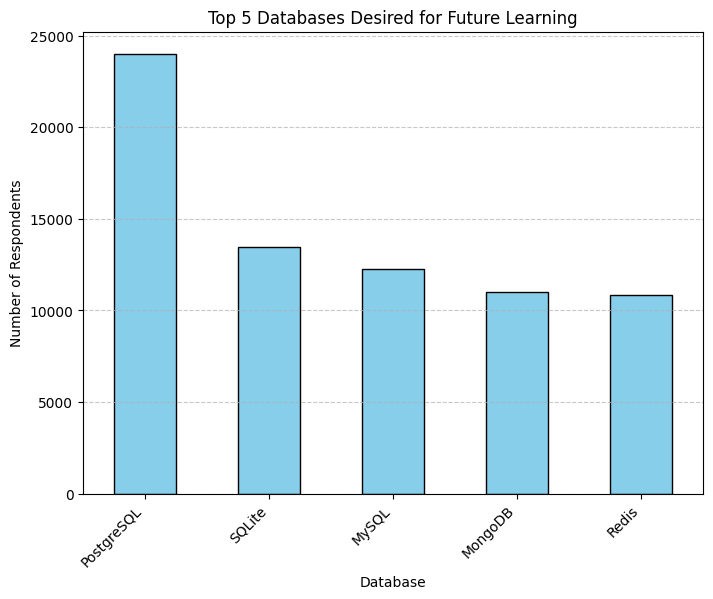

In [19]:
## Write your code here
# Connect and read DatabaseWantToWorkWith column
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT DatabaseWantToWorkWith FROM main", conn)

# Split semicolon-separated values into separate rows
db_series = df_sql["DatabaseWantToWorkWith"].dropna().str.split(";").explode()

# Count database frequencies and select top 5
db_counts = db_series.value_counts().head(5)

# Plot histogram (bar chart)
plt.figure(figsize=(8, 6))
db_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Databases Desired for Future Learning")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


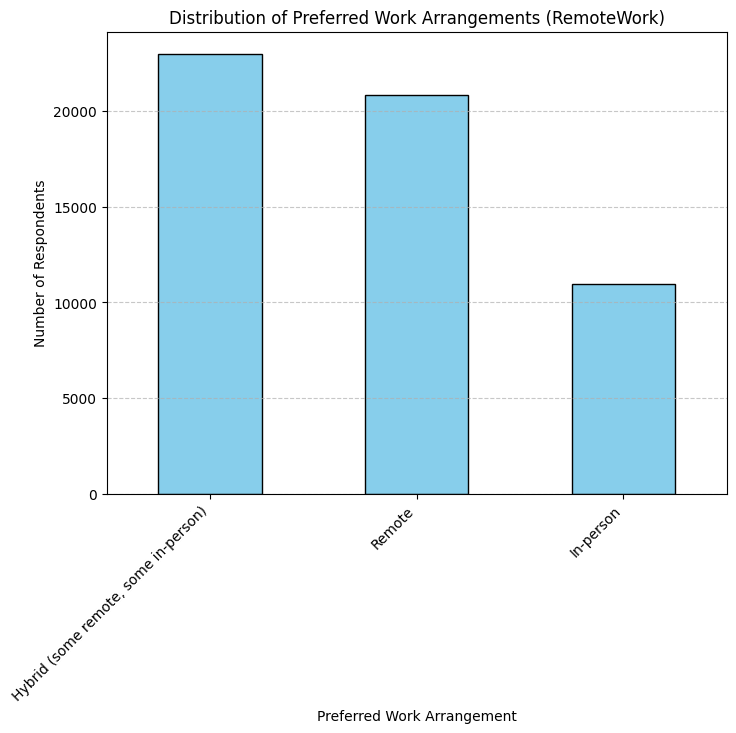

In [20]:
## Write your code here
# Connect and read RemoteWork column
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT RemoteWork FROM main", conn)

# Count frequency of each category
work_counts = df_sql["RemoteWork"].value_counts()

# Plot histogram (bar chart)
plt.figure(figsize=(8, 6))
work_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Preferred Work Arrangements (RemoteWork)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


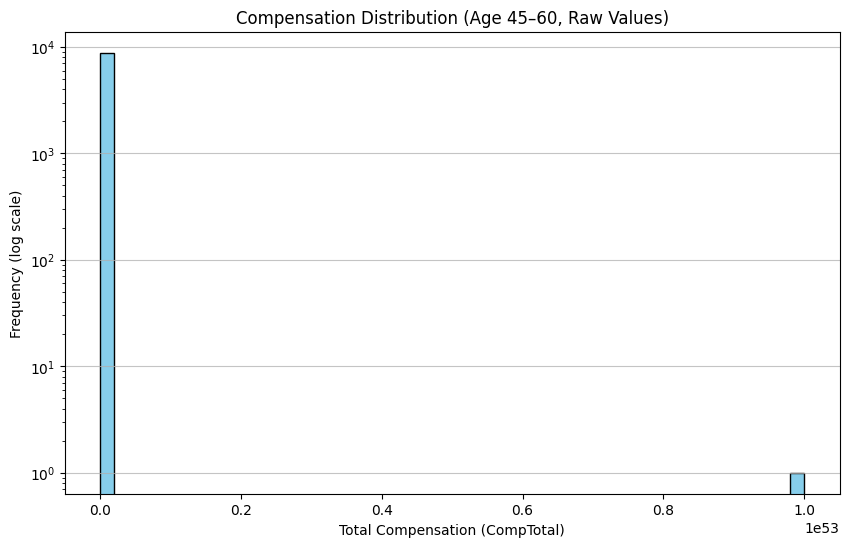

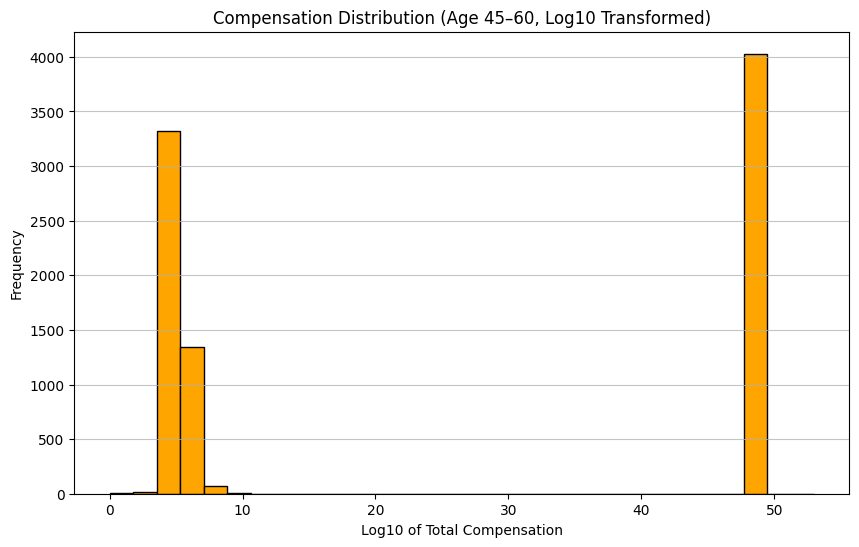

In [21]:
## Write your code here
# Connect and read Age + CompTotal
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, CompTotal FROM main", conn)

# Filter for age groups ~45 to 60
age_filter = df_sql["Age"].isin(["45-54 years old", "55-64 years old"])
df_filtered = df_sql[age_filter]

# Replace NaN with mean
mean_value = df_filtered["CompTotal"].mean(skipna=True)
comp_data = df_filtered["CompTotal"].fillna(mean_value)

# ---------- Histogram: Raw values ----------
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color="skyblue", edgecolor="black")
plt.yscale("log")  # log scale on y-axis for better view
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Frequency (log scale)")
plt.title("Compensation Distribution (Age 45–60, Raw Values)")
plt.grid(axis="y", alpha=0.75)
plt.show()

# ---------- Histogram: Log10 transformed ----------
log_comp = np.log10(comp_data[comp_data > 0])

plt.figure(figsize=(10, 6))
plt.hist(log_comp, bins=30, color="orange", edgecolor="black")
plt.xlabel("Log10 of Total Compensation")
plt.ylabel("Frequency")
plt.title("Compensation Distribution (Age 45–60, Log10 Transformed)")
plt.grid(axis="y", alpha=0.75)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_300/2257302110.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["ExperienceBin"] = pd.cut(df_filtered["YearsCodeProNumeric"], bins=bins, labels=labels, right=False)


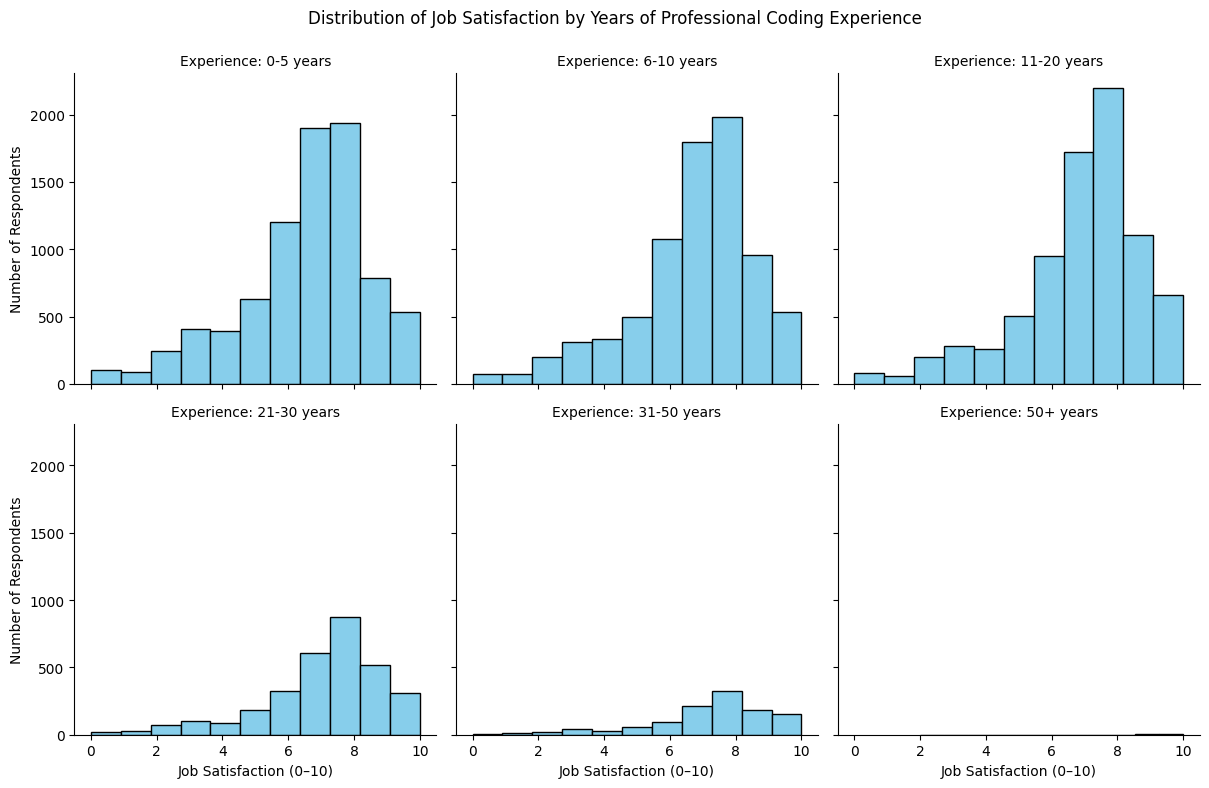

In [22]:
## Write your code here
# Connect and read JobSat + YearsCodePro
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT JobSat, YearsCodePro FROM main", conn)

# Convert YearsCodePro to numeric
def convert_years(value):
    if pd.isna(value):
        return np.nan
    if "Less than 1 year" in str(value):
        return 0.5
    if "More than 50 years" in str(value):
        return 51
    try:
        return float(value)
    except:
        return np.nan

df_sql["YearsCodeProNumeric"] = df_sql["YearsCodePro"].apply(convert_years)

# Drop missing JobSat
df_filtered = df_sql.dropna(subset=["JobSat", "YearsCodeProNumeric"])

# Bin years of experience
bins = [0, 5, 10, 20, 30, 50, 60]
labels = ["0-5", "6-10", "11-20", "21-30", "31-50", "50+"]
df_filtered["ExperienceBin"] = pd.cut(df_filtered["YearsCodeProNumeric"], bins=bins, labels=labels, right=False)

# Plot histogram of JobSat for each experience group
g = sns.FacetGrid(df_filtered, col="ExperienceBin", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(plt.hist, "JobSat", bins=11, color="skyblue", edgecolor="black")

g.set_axis_labels("Job Satisfaction (0–10)", "Number of Respondents")
g.set_titles("Experience: {col_name} years")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Job Satisfaction by Years of Professional Coding Experience")
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [23]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
